**Core question:** Are simpler words more commonly used than less simple words? 

**Proxy for simplicity:** Number of characters (i.e., length) of a word

In [24]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
# Reading in SUBTLEX Frequencies

freq_data1 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word1","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil1","Log_Freq_Per_Mil1","SUBTLCD","Lg10CD"])
freq_data1 = freq_data1[["Word1","Freq_Per_Mil1","Log_Freq_Per_Mil1"]]

freq_data2 = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word2","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil2","Log_Freq_Per_Mil2","SUBTLCD","Lg10CD"])
freq_data2 = freq_data2[["Word2","Freq_Per_Mil2","Log_Freq_Per_Mil2"]]

In [26]:
# Reading in synonym dataframe from eacl2017
adj=pd.read_csv("eacl2017/adjtrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])
noun=pd.read_csv("eacl2017/nounstrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])
verb=pd.read_csv("eacl2017/verbstrain.txt", sep="	", header=None, names=["Word1", "Word2","Synonym"])

frames = [adj,noun,verb]

data = pd.concat(frames)

# Filtering out antonyms
data = data[data.Synonym == 0]
data = data[["Word1", "Word2"]]

data['Word1'],data['Word2']=np.where((data['Word2'].str.len())>=(data['Word1'].str.len()),(data['Word2'],data['Word1']),(data['Word1'],data['Word2']))
print(data)

            Word1     Word2
1     precipitous     steep
2      mysterious  mystical
4           stout       fat
7       insulting   abusive
8           heavy      deep
...           ...       ...
2524   intimidate     bully
2528       forbid    defend
2529          fix       put
2532      outrage     shock
2533     organize    direct

[5466 rows x 2 columns]


In [27]:
# Adding column for length 
data["Word1_Length"] = ""
data["Word2_Length"] = ""

for index, row in data.iterrows():
    row["Word1_Length"] = len(str(row["Word1"]))
    row["Word2_Length"] = len(str(row["Word2"]))
    
result = pd.merge(data,freq_data1,on="Word1")
final_df = pd.merge(result,freq_data2,on="Word2")

In [28]:
final_df['Freq_Delta'] = final_df['Log_Freq_Per_Mil1'] - final_df['Log_Freq_Per_Mil2']
final_df['Length_Delta'] = final_df['Word1_Length'] - final_df['Word2_Length']

final_df

,Word1,Word2,Word1_Length,Word2_Length,Freq_Per_Mil1,Log_Freq_Per_Mil1,Freq_Per_Mil2,Log_Freq_Per_Mil2,Freq_Delta,Length_Delta
0,precipitous,steep,11,5,0.12,0.8451,2.45,2.1004,-1.2553,6
1,precipitous,steep,11,5,0.12,0.8451,2.45,2.1004,-1.2553,6
2,abrupt,steep,6,5,1.14,1.7709,2.45,2.1004,-0.3295,1
3,infuse,steep,6,5,0.18,1.0000,2.45,2.1004,-1.1004,1
4,mysterious,mystical,10,8,15.00,2.8842,2.82,2.1614,0.7228,2
...,...,...,...,...,...,...,...,...,...,...
4916,start,bulge,5,5,340.10,4.2392,0.94,1.6902,2.5490,0
4917,announce,usher,8,5,9.76,2.6981,2.37,2.0864,0.6117,3
4918,falsify,alter,7,5,0.24,1.1139,4.78,2.3892,-1.2753,2
4919,braid,lace,5,4,0.94,1.6902,3.71,2.2788,-0.5886,1


In [29]:
final_df.to_csv("length_df_final.csv")

In [30]:
#Calculate correlations 

final_df = final_df.astype({'Length_Delta':'float','Freq_Delta':'float','Length_Delta':'float'})

corr_length = final_df["Length_Delta"].corr(final_df["Freq_Delta"])
print("the correlation between frequency and word length delta is", corr_length)

the correlation between frequency and word length delta is -0.37146326420092635


In [31]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

<Axes: xlabel='Length_Delta', ylabel='Freq_Delta'>

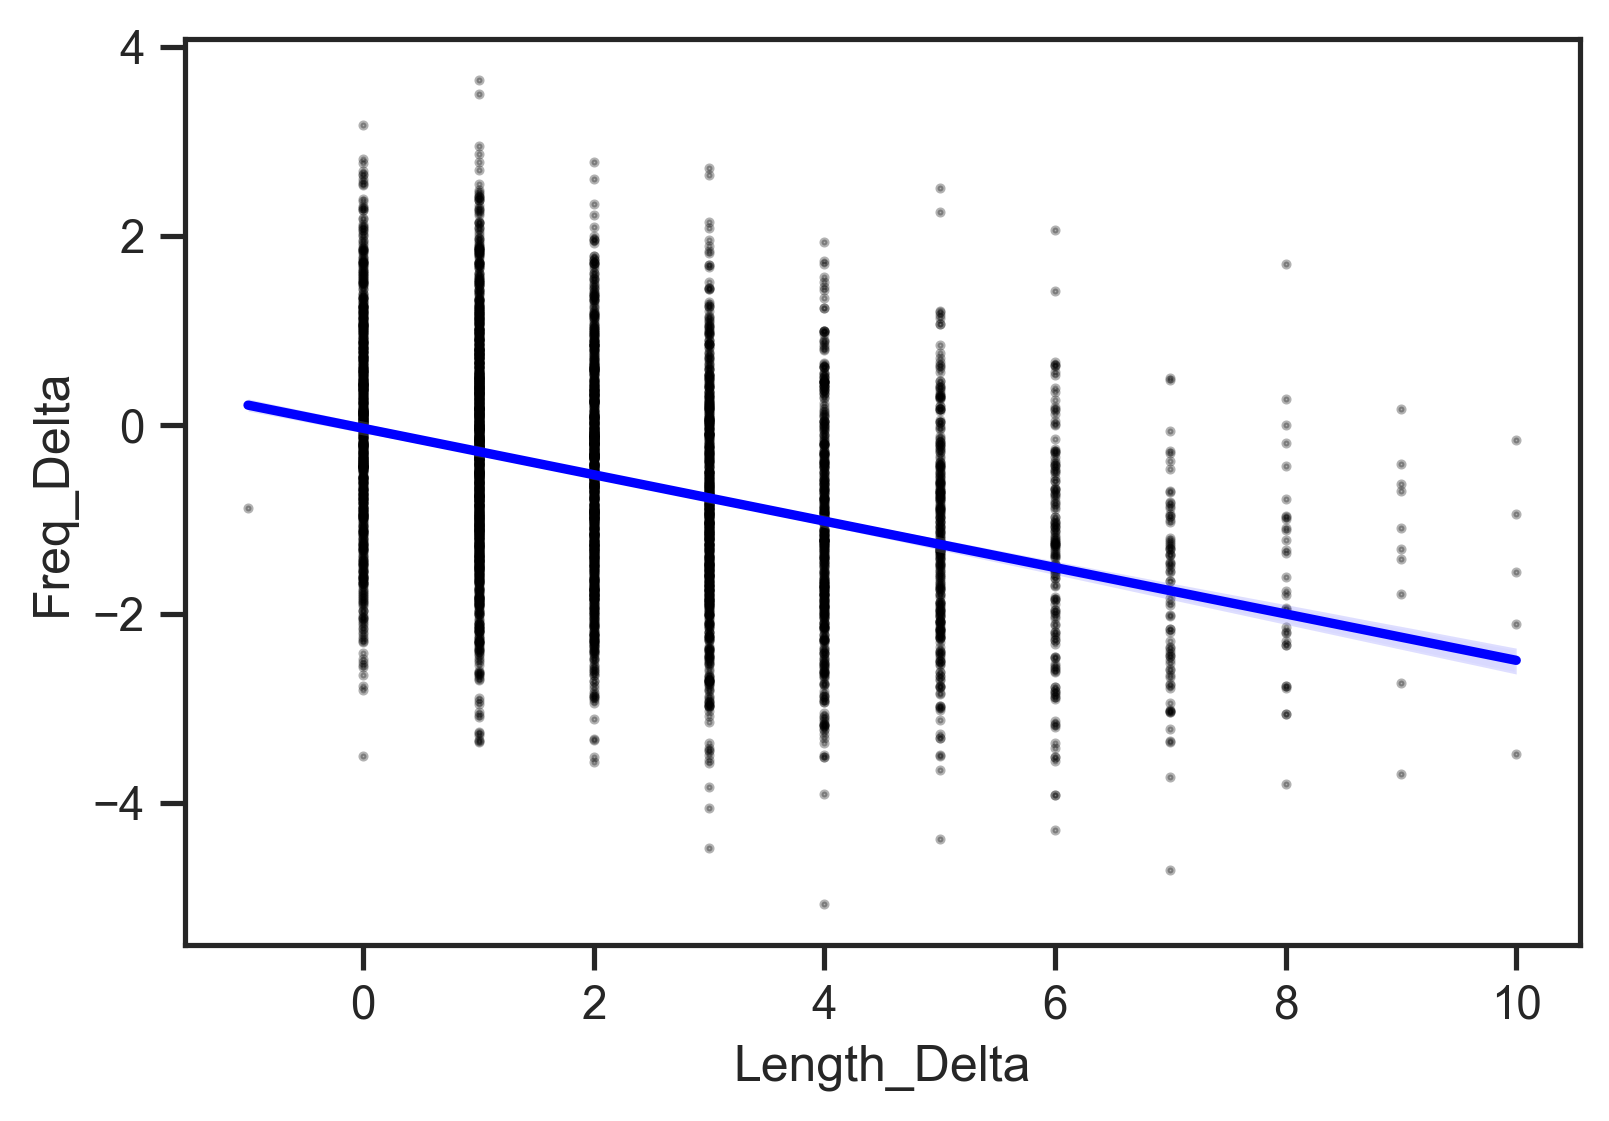

In [32]:
sns.regplot(x = final_df["Length_Delta"], y = final_df["Freq_Delta"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            line_kws = {"color": "blue"},
            ci = 95) 